In [29]:
import pandas as pd
import numpy as np  

In [30]:
# data manipulation
data_ = pd.read_csv("NG agric exports\\nigeria_agricultural_exports.csv")
country = pd.read_csv("country.csv")
data_['Date'] = pd.to_datetime(data_['Date'])

data_['Profit'] = data_['unit_price']*data_['Profit per unit']
# data_ = data_.drop(columns=['Transportation Mode'], axis=1)
data_ = pd.merge(data_, country, how='inner', left_on='Export Country', right_on='Country')


data_.to_csv('cleaned_data.csv', header=True, index=None)
data_


,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Profit,Country,Latitude,Longitude
0,Rubber,Farmgate Nigeria Limited,Austria,2023-11-16,721,31443.05,5863.92,22670439.05,Lagos,Sea,1.843795e+08,Austria,47.516236,14.550072
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,2021-01-08,881,23151.97,5868.73,20396885.57,Lagos,Sea,1.358727e+08,Germany,51.165691,10.451526
2,Cassava,Farmgate Nigeria Limited,Germany,2020-10-14,702,18536.45,5105.01,13012587.90,Calabar,Sea,9.462876e+07,Germany,51.165691,10.451526
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,2022-12-31,191,21981.31,7781.54,4198430.21,Warri,Sea,1.710484e+08,Belgium,50.508308,4.351728
4,Sesame,Nigeria Agro Export Company,France,2022-12-19,373,13415.94,9590.95,5004145.62,Lagos,Sea,1.286716e+08,France,48.856614,2.352221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Cashew,Nigeria Agro Export Company,Netherlands,2023-06-11,730,49937.99,9149.40,36454732.70,Warri,Sea,4.569026e+08,Netherlands,52.377956,4.897976
996,Rubber,Agro Export Nigeria Ltd,Sweden,2023-11-01,952,15607.62,5086.57,14858454.24,Lagos,Sea,7.938925e+07,Sweden,59.334732,18.057936
997,Rubber,Agro Allied Exporters Nigeria Limited,Netherlands,2023-08-06,447,49544.50,6381.92,22146391.50,Lagos,Sea,3.161890e+08,Netherlands,52.377956,4.897976
998,Cashew,Greenfield Agro Exporters Nigeria Limited,Germany,2023-03-05,315,42814.92,6620.22,13486699.80,Lagos,Sea,2.834442e+08,Germany,51.165691,10.451526


First, we’ll look at Sales performance:

●	What are the top-selling products?

●	Which company has the highest sales revenue?

●	How do sales vary across different export countries? You should look at 

●	Product sales

●	average revenue per country

●	Total units sold 

●	Is there any correlation between the units sold and the profit generated?


In [31]:
data_.head()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Profit,Country,Latitude,Longitude
0,Rubber,Farmgate Nigeria Limited,Austria,2023-11-16,721,31443.05,5863.92,22670439.05,Lagos,Sea,1.843795e+08,Austria,47.516236,14.550072
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,2021-01-08,881,23151.97,5868.73,20396885.57,Lagos,Sea,1.358727e+08,Germany,51.165691,10.451526
2,Cassava,Farmgate Nigeria Limited,Germany,2020-10-14,702,18536.45,5105.01,13012587.90,Calabar,Sea,9.462876e+07,Germany,51.165691,10.451526
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,2022-12-31,191,21981.31,7781.54,4198430.21,Warri,Sea,1.710484e+08,Belgium,50.508308,4.351728
4,Sesame,Nigeria Agro Export Company,France,2022-12-19,373,13415.94,9590.95,5004145.62,Lagos,Sea,1.286716e+08,France,48.856614,2.352221


In [32]:
# What are the top-selling products?
data_.groupby(['Product Name']).agg({'Units Sold':'sum', 'Profit':'sum'}).sort_values('Units Sold', ascending=False)

,Units Sold,Profit
Product Name,,
Sesame,76132,2.514496e+10
Cocoa,76129,2.503576e+10
Cashew,70833,2.617598e+10
Rubber,66641,2.290259e+10
Plantain,64863,2.285773e+10
Cassava,64234,2.236130e+10
Palm Oil,63879,2.219326e+10
Ginger,54093,1.729503e+10


In [33]:
# Which company has the highest sales revenue?
data_.groupby(['Company']).agg({'Units Sold':'sum', 'Profit':'sum'}).sort_values('Profit', ascending=False)

,Units Sold,Profit
Company,,
Nigeria Agro Export Company,54717,2.102701e+10
Agro Export Nigeria Ltd,59944,1.975034e+10
Prime Agro Exports Nigeria Limited,52035,1.941116e+10
Farmgate Nigeria Limited,52010,1.928597e+10
Greenfield Agro Exporters Nigeria Limited,50633,1.867691e+10
Nigerian Export Promotion Council (NEPC),55833,1.837719e+10
Solid Agro Nigeria Limited,51565,1.754198e+10
Golden Farms Nigeria Limited,60724,1.694262e+10
Agriplus Nigeria Limited,52139,1.668311e+10


●	How do sales vary across different export countries? You should look at 

    ○	Product sales, pivot table

    ○	average revenue per country, 

    ○	Total units sold 


In [34]:
# Product sales over country
val_ = 'Units Sold'
t_ = data_.groupby(['Export Country', 'Product Name']).agg({val_:'sum'}).reset_index().pivot(index='Export Country', columns='Product Name', values=val_).reset_index()
t_['Total Units Sold']=t_[list(t_.columns.drop(['Export Country']))].sum(axis=1)

t_

Product Name,Export Country,Cashew,Cassava,Cocoa,Ginger,Palm Oil,Plantain,Rubber,Sesame,Total Units Sold
0,Austria,8590,7473,8358,5764,5352,4573,3378,8395,51883
1,Belgium,9698,3676,5749,4596,6420,6783,7247,7681,51850
2,Denmark,6803,8933,8618,6287,9117,6952,7869,5370,59949
3,France,12008,6238,11220,2315,7838,6766,3278,7334,56997
4,Germany,3988,12251,7423,4458,4450,6201,6524,3042,48337
5,Italy,5161,4577,5465,3854,8589,9073,10606,12444,59769
6,Netherlands,4868,4229,5810,6885,6050,6563,9155,6893,50453
7,Spain,6445,6236,9113,6539,7209,5412,4403,6093,51450
8,Sweden,5221,3755,11514,4372,5578,4429,8037,9281,52187
9,Switzerland,8051,6866,2859,9023,3276,8111,6144,9599,53929


In [35]:
# average revenue per country
val_ = 'Profit per unit'
data_.groupby(['Export Country', 'Product Name']).agg({val_:'mean'}).reset_index().pivot(index='Export Country', columns='Product Name', values=val_).reset_index()

Product Name,Export Country,Cashew,Cassava,Cocoa,Ginger,Palm Oil,Plantain,Rubber,Sesame
0,Austria,7192.567647,6921.467500,6350.351538,5444.352500,6840.509091,6603.088182,6173.328750,6119.450000
1,Belgium,6112.697059,7092.555714,5782.660833,6045.094444,6142.767500,6842.490000,5718.209333,6180.663125
2,Denmark,6553.338750,6789.034211,5134.225385,5381.597000,6045.228889,6775.767857,5400.560769,6909.500000
3,France,5901.237619,7249.228462,6581.771111,6281.642500,5898.678462,6576.304667,5219.737778,6211.908333
4,Germany,4992.821429,6741.278000,5939.370769,5479.961250,5631.904444,6335.517273,4977.518462,7437.215000
5,Italy,5986.317273,7436.193333,5590.467273,5645.261429,5906.092000,5104.867059,6516.624375,6099.881000
6,Netherlands,5884.846667,4654.857000,5945.965385,6484.047143,5481.562857,5552.653077,6544.589286,7489.695000
7,Spain,6718.199231,4708.391111,5081.514375,6207.718462,7369.869167,4602.512000,5979.365000,6240.147000
8,Sweden,7081.002857,6698.112857,5855.218182,5522.990000,5649.951667,6631.078889,5628.508571,6363.856667
9,Switzerland,6248.144286,5765.638571,5923.786000,6623.728000,5473.597500,6445.924167,5784.115333,6045.866667


 Company:  ALL 
 Product:  ALL 
 Export Country:  ALL 
 Destination Port:  ALL


,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode,Profit,Country,Latitude,Longitude
0,Rubber,Farmgate Nigeria Limited,Austria,2023-11-16,721,31443.05,5863.92,22670439.05,Lagos,Sea,1.843795e+08,Austria,47.516236,14.550072
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,2021-01-08,881,23151.97,5868.73,20396885.57,Lagos,Sea,1.358727e+08,Germany,51.165691,10.451526
2,Cassava,Farmgate Nigeria Limited,Germany,2020-10-14,702,18536.45,5105.01,13012587.90,Calabar,Sea,9.462876e+07,Germany,51.165691,10.451526
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,2022-12-31,191,21981.31,7781.54,4198430.21,Warri,Sea,1.710484e+08,Belgium,50.508308,4.351728
4,Sesame,Nigeria Agro Export Company,France,2022-12-19,373,13415.94,9590.95,5004145.62,Lagos,Sea,1.286716e+08,France,48.856614,2.352221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Cashew,Nigeria Agro Export Company,Netherlands,2023-06-11,730,49937.99,9149.40,36454732.70,Warri,Sea,4.569026e+08,Netherlands,52.377956,4.897976
996,Rubber,Agro Export Nigeria Ltd,Sweden,2023-11-01,952,15607.62,5086.57,14858454.24,Lagos,Sea,7.938925e+07,Sweden,59.334732,18.057936
997,Rubber,Agro Allied Exporters Nigeria Limited,Netherlands,2023-08-06,447,49544.50,6381.92,22146391.50,Lagos,Sea,3.161890e+08,Netherlands,52.377956,4.897976
998,Cashew,Greenfield Agro Exporters Nigeria Limited,Germany,2023-03-05,315,42814.92,6620.22,13486699.80,Lagos,Sea,2.834442e+08,Germany,51.165691,10.451526


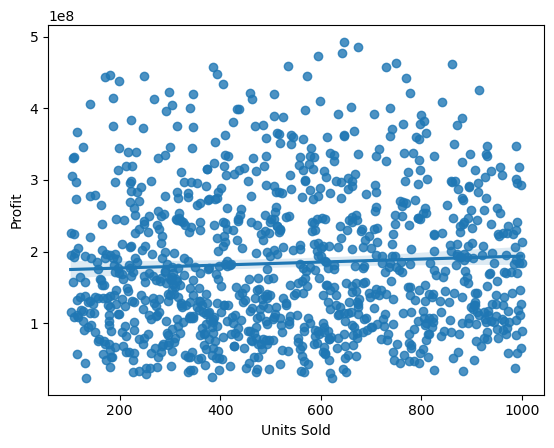

In [68]:
# Is there any correlation between the units sold and the profit generated?
t_ = data_

import seaborn as sns
query=t_[t_.columns[0]]==t_[t_.columns[0]]

company = 'ALL'   
# to be created as 
'''s_= list(pd.unique(t_['Company']))
s_+=["ALL"]
s_'''
if (company!='ALL'):
    query = query & (t_['Company']==company)

prod_ ='ALL'
# to be created as 
'''s_= list(pd.unique(t_['Product Name']))
s_+=["ALL"]
s_'''
if (prod_!='ALL'):
    query = query & (t_['Product Name']==prod_)

Export_c = 'ALL'
# to be created as 
'''s_= list(pd.unique(t_['Export Country']))
s_+=["ALL"]
s_'''
if (Export_c!='ALL'):
    query&=(t_['Export Country']==Export_c)

Destination_p = 'ALL'
# to be created as 
'''s_= list(pd.unique(t_['Destination Port']))
s_+=["ALL"]
s_'''
if (Destination_p!='ALL'):
    query&=(t_['Destination Port']==Destination_p)
    

sns.regplot(t_[ query], x='Units Sold', y='Profit')
print(" Company: ", company, '\n',"Product: ", prod_, '\n', 'Export Country: ', Export_c , '\n', 'Destination Port: ', Destination_p)



import plotly.express as px
fig = px.scatter(
    t_[ query], x='Units Sold', y='Profit', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()      
t_[query]

Let’s talk Time-Series:

●	How do sales vary over time (monthly, quarterly, annually)?

●	Are there any seasonal trends in sales?

●	Is there a relationship between the date of purchase and the profit margin?


In [69]:
import bokeh
import bokeh._version 
# from bokeh.charts import Bar, output_file, show
t1_ = t_[query][['Date', 'Units Sold']].groupby(['Date']).agg({"Units Sold":"sum"})

# # Monthly

# gb = "Yearly"  # gb = ["Monthly", "Quarterly", "Yearly"]

# t1_['w']=t1_.index
# if gb == "Monthly":
#     t1_['w'] = t1_['w'].dt.month
# elif gb == "Quarterly":
#     t1_['w'] = t1_['w'].dt.quarter
# else:
#     t1_['w'] = t1_['w'].dt.year


# w_ = t1_.groupby(['w']).agg({"Units Sold":'sum'})
t1_

,Units Sold
Date,
2020-01-05,289
2020-01-06,492
2020-01-07,656
2020-01-08,1485
2020-01-09,151
...,...
2023-12-23,946
2023-12-24,457
2023-12-28,763


Following up will be our Cost Analysis:

●	What is the cost of goods sold (COGS) as a percentage of revenue?

●	How does the COGS vary across different products?


In [70]:
# 1	Which destination ports receive the highest volume of exports?

data_[query].groupby(['Destination Port']).agg({'Units Sold':'sum'}).sort_values(by =['Units Sold'] , ascending=[False])

,Units Sold
Destination Port,
Lagos,316417
Warri,79336
Port Harcourt,70736
Calabar,70315


In [71]:
# 2	What are the transportation modes commonly used for export?

data_[query].groupby(['Transportation Mode']).agg({'Transportation Mode':'count'})

,Transportation Mode
Transportation Mode,
Sea,1000


In [72]:
# 3	Rank the destination port by the export value.

data_[query].groupby(['Destination Port']).agg({'Export Value':'sum'}).sort_values(by=['Export Value'], ascending=False)

,Export Value
Destination Port,
Lagos,9.738667e+09
Warri,2.347900e+09
Port Harcourt,2.152910e+09
Calabar,2.078188e+09


In [136]:
# 4	Show the top export product for each port.

t_ = data_[query].groupby(['Destination Port', 'Product Name']).agg({'Units Sold':'sum'}).reset_index()

df=pd.DataFrame(columns=['Destination Port', 'Product Name', 'Units Sold'])
for p in data_[query]['Destination Port'].unique():
    df = pd.concat([df, t_[t_['Destination Port']==p].sort_values(by=['Units Sold'], ascending=[False]).reset_index().drop(['index'], axis=1).head(1)], ignore_index=True)
df

,Destination Port,Product Name,Units Sold
0,Lagos,Cashew,49146
1,Calabar,Sesame,15409
2,Warri,Cocoa,13570
3,Port Harcourt,Palm Oil,11669
